### Niranjan Poudel (Niranjan111@hotmail.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
train = pd.read_csv(r"C:\Users\Niranjan.p\Desktop\Home work and assignments\machine learning\Kaggle\titanic\train.csv")
test = pd.read_csv(r"C:\Users\Niranjan.p\Desktop\Home work and assignments\machine learning\Kaggle\titanic\test.csv")

In [3]:
pd.set_option('display.max_rows',100) ## maximum number of rows the panda will display
pd.set_option('display.max_columns',30)### for the visualization of all the coluamns

### Lets first look at the nature and type of the data

In [4]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Quick, Miss. Phyllis May",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Name column containts unique names but also contains some title which can be pretty useful, so trying to extract the title.

In [6]:
train['Title']=train.Name.str.split(r'\s*,\s*|\s*\.\s*').str[1] # seperating the title from name

In [7]:
## keeping top frquent four categories and renaming other categories as other
temp = train['Title'].value_counts()
temp1 = temp[:4].index # Getting top 4 values
train['Title'] = train['Title'].where(train['Title'].isin(temp1),'Other')
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [8]:
### dropping the Name column which is further not required and passenger id as well
train=train.drop(['Name'],axis=1)

### There is some kind of grouping infront of some tickets lets see if we can understand them some how

In [9]:
train['Tic'] = train.Ticket.str.split() ### Spliting the ticket into the list of two if there is some thing infront of number
train['len']=train.Tic.str.len() # Adding the column to count the object inside the list created above
train['Tick']=0 # Adding a column where we will add the information available before ticket

In [10]:
## For loop to ssign the values to new column with this information of ticket
for i in range(len(train)):
  if (train.iloc[i,13]==2):
        train.iloc[i,14]=train.iloc[i,12][0]
  else:
        train.iloc[i,14]=0

In [11]:
# There is extra dot or slash in some tickets, removing them so that same group of tickets can be matched.
train['Tick']=train.Tick.str.replace('.','')
train['Tick']=train.Tick.str.replace('/','')
# Some of them vary in case(lowercase and upper), so make all upper case
train['Tick']=train.Tick.str.upper()

In [12]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Tic,len,Tick
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"[A/5, 21171]",2,A5
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"[PC, 17599]",2,PC
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"[STON/O2., 3101282]",2,STONO2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,[113803],1,NaN
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,[373450],1,NaN


In [13]:
### dropping the Ticket,Tic and len column which is further not required
train=train.drop(['Ticket','Tic','len','PassengerId'],axis=1)

In [14]:
train['Tick'].value_counts() ### These are some information we extracted from infront of the ticket

PC         60
CA         41
A5         21
SOTONOQ    15
SCPARIS    11
WC         10
A4          7
SOC         6
STONO2      6
C           5
FCC         5
WEP         3
PP          3
SOPP        3
SOTONO2     2
SWPP        2
SCAH        2
PPP         2
FA          1
SCA4        1
AS          1
FC          1
SCOW        1
CASOTON     1
SP          1
SC          1
SOP         1
Name: Tick, dtype: int64

### Lets reduce the number of information from ticket

In [15]:
train['Tick'] = train['Tick'].fillna('No_info') 

In [16]:
tic_temp=train['Tick'].value_counts() 
tic_temp1 = tic_temp[:4].index # Getting top 3 values values from value counts
train['Tick'] = train['Tick'].where(train['Tick'].isin(tic_temp1),'Other') ## Chaging the non-frequent into other and reducing categories

### Next lets work on the age variable, we need to fill the missing age variables

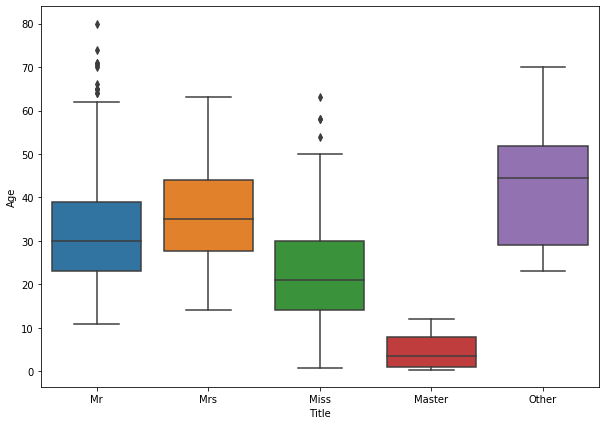

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Title", y="Age", data=train)
plt.show()

### We will use age from the title to provide age to the missing age values.

In [18]:
## Filling the missing age values
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age']=46

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
 10  Tick      891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### The cabin also contains a lot of empty spaces. My guess is those having non-information of cabin is non-cabin so making it as bianry variable cabin or No_info

In [20]:
train['Cabin'] = train['Cabin'].fillna('No_info') 

In [21]:
train.loc[(train.Cabin!='No_info'),'Cabin']='Cabin'

In [22]:
train.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Tick
0,0,3,male,22.0,1,0,7.2500,No_info,S,Mr,A5
1,1,1,female,38.0,1,0,71.2833,Cabin,C,Mrs,PC
2,1,3,female,26.0,0,0,7.9250,No_info,S,Miss,Other
3,1,1,female,35.0,1,0,53.1000,Cabin,S,Mrs,No_info
4,0,3,male,35.0,0,0,8.0500,No_info,S,Mr,No_info
5,0,3,male,33.0,0,0,8.4583,No_info,Q,Mr,No_info
6,0,1,male,54.0,0,0,51.8625,Cabin,S,Mr,No_info
7,0,3,male,2.0,3,1,21.0750,No_info,S,Master,No_info
8,1,3,female,27.0,0,2,11.1333,No_info,S,Mrs,No_info
9,1,2,female,14.0,1,0,30.0708,No_info,C,Mrs,No_info


### Next there is missing two values for Embarked lets try to fill those two

Lets fill those by more frequenty occuring type or the mode which is 'S'

In [23]:
train.loc[(train.Embarked.isnull()),'Embarked']='S'

## (Lets make similar data manipulation to test set as well)

In [24]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosblom, Miss. Salli Helena",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Same information abstraction from Name variable

In [26]:
test['Title']=test.Name.str.split(r'\s*,\s*|\s*\.\s*').str[1] # seperating the title from name

In [27]:
## keeping top frquent four categories and renaming other categories as other
temp = test['Title'].value_counts()
temp1 = temp[:4].index # Getting top 4 values
test['Title'] = test['Title'].where(test['Title'].isin(temp1),'Other')
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [28]:
### dropping the Name column which is further not required and passenger id as well
test=test.drop(['Name'],axis=1)

### Trying to gather same kind of information from the ticket number

In [29]:
test['Tic'] = test.Ticket.str.split() ### Spliting the ticket into the list of two where there is something in ticket
test['len']=test.Tic.str.len() # Adding the column to count the object inside the list created above
test['Tick']=0 # Adding a column where we will add the information before ticket

In [30]:
## For loop to assign the values to new column with this information of ticket
for i in range(len(test)):
  if (test.iloc[i,12]==2):
        test.iloc[i,13]=test.iloc[i,11][0]
  else:
        test.iloc[i,13]=0

In [31]:
# There is extra dot or slash in some tickets, removing them so that same group of tickets can be matched.
test['Tick']=test.Tick.str.replace('.','')
test['Tick']=test.Tick.str.replace('/','')
# Some of them vary in case(lowercase and upper), so make all upper case
test['Tick']=test.Tick.str.upper()

### Check if the top categories are consistent with the categories in train set or not

In [32]:
test['Tick'].value_counts()

PC         32
CA         27
SOTONOQ     9
SCPARIS     8
A5          7
WC          5
SOPP        4
FCC         4
C           3
A4          3
SCAH        2
FC          2
SOC         2
PP          1
SC          1
STONO2      1
STONOQ      1
WEP         1
SCA4        1
LP          1
AQ3         1
AQ4         1
SOTONO2     1
SCA3        1
Name: Tick, dtype: int64

### We will take the same tic_temp1 file (Same categories) from train set to make consistent categories across train and test set

In [33]:
test['Tick'] = test['Tick'].fillna('No_info') 

In [34]:
test['Tick'] = test['Tick'].where(test['Tick'].isin(tic_temp1),'Other') ## Chaging the non-frequent into other and reducing categories

In [35]:
### dropping the Ticket,Tic and len column which is further not required
test=test.drop(['Ticket','Tic','len'],axis=1)

In [36]:
### lets check the age variable and try to add missing values

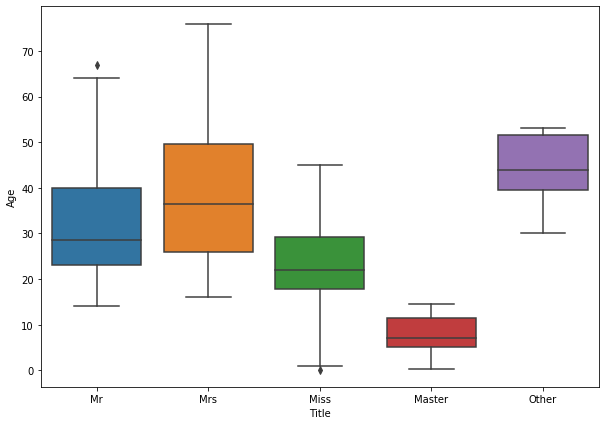

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Title", y="Age", data=test)
plt.show()

In [38]:
## Filling the missing age values, some values are filled slightly different than the train set based on the inforamtion from box-plot
test.loc[(test.Age.isnull())&(test.Title=='Mr'),'Age']=29 # differnt from the filling in train set
test.loc[(test.Age.isnull())&(test.Title=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Title=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Title=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Title=='Other'),'Age']=46

### Making cabin info cabin or non-cabin

In [39]:
test['Cabin'] = test['Cabin'].fillna('No_info') 

In [40]:
test.loc[(test.Cabin!='No_info'),'Cabin']='Cabin'

### One missing fare value filling it with mean of the fare values

In [41]:
test['Fare'].mean()

35.6271884892086

In [42]:
test.loc[(test.Fare.isnull()),'Fare']=35.60

In [43]:
test.describe(include='all')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Tick
count,418.000000,418.000000,418,418.000000,418.000000,418.000000,418.000000,418,418,418,418
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,2,3,5,5
top,NaN,NaN,male,NaN,NaN,NaN,NaN,No_info,S,Mr,No_info
freq,NaN,NaN,266,NaN,NaN,NaN,NaN,327,270,240,299
mean,1100.500000,2.265550,NaN,29.754785,0.447368,0.392344,35.627123,NaN,NaN,NaN,NaN
std,120.810458,0.841838,NaN,13.014920,0.896760,0.981429,55.840500,NaN,NaN,NaN,NaN
min,892.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,29.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,36.000000,1.000000,0.000000,31.500000,NaN,NaN,NaN,NaN


### Next let us change the variables type if needed but maintaining consistency with test and train data set.

In [44]:
categorical = ['Pclass','Sex', 'Cabin','Embarked','Title','Tick']

for col in categorical: 
    train[col] = train[col].astype("category")
    
categorical = ['Pclass','Sex', 'Cabin','Embarked','Title','Tick']

for col in categorical: 
    test[col] = test[col].astype("category")

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Sex          418 non-null    category
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Cabin        418 non-null    category
 8   Embarked     418 non-null    category
 9   Title        418 non-null    category
 10  Tick         418 non-null    category
dtypes: category(6), float64(2), int64(3)
memory usage: 19.7 KB


### Correlation heatmap for train and test set

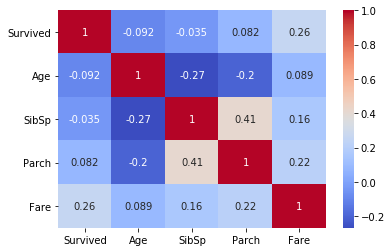

In [46]:
## lets look at the correlatiion for train set
sns.heatmap(train.corr(), cmap='coolwarm',annot=True)
plt.show()

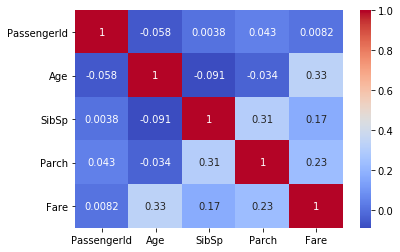

In [47]:
### lets look at the correaltion for the test set
sns.heatmap(test.corr(), cmap='coolwarm',annot=True)
plt.show()

### Now we have manipulated the train and test set, so we move foward to establish logistic regression model and predicting the outcome of test set

We can rescale the age and fare variable either by standardizing or bringing them down to small scale.

We will divide Age by 10 and Fare by 100 to reduce the scale

In [48]:
train['Age']=train['Age']/10
train['Fare']=train['Fare']/100
test['Age']=test['Age']/10
test['Fare']=test['Fare']/100

### Next step lets create dummy variables for categorical datas

In [49]:
train= pd.get_dummies(train,drop_first=True) ### Creating dummies for categorical variables
test= pd.get_dummies(test,drop_first=True) ### Creating dummies for categorical variables

Spliting the data set manually

In [50]:
y_train = train['Survived']
X_train = train.drop('Survived',axis=1)
X_test=test.drop('PassengerId',axis=1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Checking with cross validation of k=5 and k=10

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="accuracy" ) ### cross-flod k=5
accuracy

array([0.83798883, 0.81460674, 0.80337079, 0.80898876, 0.86516854])

In [55]:
round(accuracy.mean(),2)

0.83

In [56]:
accuracy = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="accuracy" ) ### cross-flod k=10
accuracy

array([0.85555556, 0.84269663, 0.7752809 , 0.86516854, 0.82022472,
       0.7752809 , 0.80898876, 0.83146067, 0.87640449, 0.87640449])

In [57]:
round(accuracy.mean(),2)

0.83

### The cross validation from both K=5 and K=10 is 0.83

### Next we will do prediction fo the test set

In [58]:
test_predictions = logistic.predict(X_test)

In [59]:
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_No_info,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Tick_CA,Tick_No_info,Tick_Other,Tick_PC
0,892,3.45,0,0,0.078292,0,1,1,1,1,0,0,1,0,0,0,1,0,0
1,893,4.70,1,0,0.070000,0,1,0,1,0,1,0,0,1,0,0,1,0,0
2,894,6.20,0,0,0.096875,1,0,1,1,1,0,0,1,0,0,0,1,0,0
3,895,2.70,0,0,0.086625,0,1,1,1,0,1,0,1,0,0,0,1,0,0
4,896,2.20,1,1,0.122875,0,1,0,1,0,1,0,0,1,0,0,1,0,0


In [61]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':test_predictions})

In [62]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [63]:
len(submission)

418

In [64]:
submission.to_csv(r'C:\Users\Niranjan.p\Desktop\Home work and assignments\machine learning\submission.csv',index=False)

## Rank in the kaggle competition of 5007 as of 2/23/2020, 1:21PM with score of 0.78468